# Startup Success Prediction Challenge

## 1. Business Understanding

### Project Overview
This project addresses a critical challenge faced by startup accelerators worldwide: **predicting which startups have the highest probability of becoming successful market leaders**. The analysis is based on a comprehensive dataset containing information about hundreds of startups, including their funding history, location, industry sector, strategic connections, and milestones achieved.

### Business Objectives
- **Primary Goal:** Develop a machine learning model capable of accurately predicting startup success
- **Business Impact:** Support investors and accelerators in making more strategic investment decisions
- **Success Metric:** Achieve at least 80% accuracy in startup success prediction

### Dataset Description
The project utilizes three key data files:
- **`train.csv`:** Training dataset with startups and target variable (success labels)
- **`test.csv`:** Test dataset without target column for final predictions
- **`sample_submission.csv`:** Expected submission format for model evaluation

### Key Features Available
- **Funding History:** Total funding amount, number of funding rounds, timing of funding events
- **Geographic Location:** State-based location indicators (CA, NY, MA, TX, others)
- **Industry Sector:** Category codes and specific industry classifications
- **Strategic Connections:** Investor relationships and network connections
- **Milestones:** Achievement tracking and milestone timing

---

## 2. Data Understanding

### Setup and Data Loading

This section focuses on loading the necessary libraries and importing the data to set up the analytical environment.

### Importing Libraries
We import essential libraries for comprehensive data analysis:
* **`numpy` (np):** High-performance numerical operations and array manipulation
* **`pandas` (pd):** Primary tool for data manipulation and DataFrame analysis
* **`matplotlib.pyplot` (plt) and `seaborn` (sns):** Advanced data visualization capabilities
* **`scipy.stats`:** Statistical analysis and hypothesis testing
* **`sklearn`:** Machine learning algorithms, preprocessing, and model evaluation tools

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

pd.set_option('display.max_columns', 400)  # Show all columns in output
pd.set_option('display.max_rows', 10000)  # Show all rows in output

### Loading the Data
We read the `train.csv` (training data) and `test.csv` (test data) files into two different DataFrames, **`df`** and **`df_val`**. The `df` DataFrame will be the focus of our analysis and cleaning to build the model.

**Dataset Structure:**
- **Training Set (`df`):** Contains 646 startups with complete feature information and success labels
- **Test Set (`df_val`):** Contains 277 startups for final model evaluation (without labels)
- **Target Variable:** Binary classification (0 = unsuccessful, 1 = successful startup)

In [47]:
df = pd.read_csv("../input/campeonato-inteli-modulo3-2025/train.csv")
df_val = pd.read_csv("../input/campeonato-inteli-modulo3-2025/test.csv")

In [48]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
641,72,NaN,NaN,0.14,0.14,3,1,355000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1
642,276,1.79,3.30,2.08,2.33,8,3,3352194,2,0,0,0,0,1,analytics,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,9.5,0
643,298,3.70,4.10,NaN,NaN,4,2,15000000,0,0,0,1,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.0,1
644,363,5.75,5.75,8.01,9.84,4,1,1000000,2,0,1,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,1
645,512,6.26,6.26,6.01,6.01,10,1,22200000,1,1,0,0,0,0,public_relations,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9.0,0


### Data Quality Assessment

A crucial step in data understanding is to assess the quality of the data. We focus on identifying and quantifying the missing values (`NaN`) to understand data completeness and potential issues.

## Missing Value Analysis
The following analysis calculates and displays a comprehensive summary of missing values for each column, including both count and percentage metrics for both training and test datasets.

In [49]:
missing_summary = pd.concat([
    df.isna().sum().rename('missing_count_train'),
    (df.isna().mean().round(3) * 100).rename('missing_percent_train'),
    df_val.isna().sum().rename('missing_count_val'),
    (df_val.isna().mean().round(3) * 100).rename('missing_percent_val')
], axis=1)

print(missing_summary)

                          missing_count_train  missing_percent_train  \
id                                          0                    0.0   
age_first_funding_year                     35                    5.4   
age_last_funding_year                       9                    1.4   
age_first_milestone_year                  138                   21.4   
age_last_milestone_year                   111                   17.2   
relationships                               0                    0.0   
funding_rounds                              0                    0.0   
funding_total_usd                           0                    0.0   
milestones                                  0                    0.0   
is_CA                                       0                    0.0   
is_NY                                       0                    0.0   
is_MA                                       0                    0.0   
is_TX                                       0                   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Key Missing Value Patterns

| Column | Missing Count Train | Missing Percent Train | Missing Count Test | Missing Percent Test |
| :--- | :--- | :--- | :--- | :--- |
| `age_first_milestone_year` | 138 | 21.4% | 11 | 4.0% |
| `age_last_milestone_year` | 111 | 17.2% | 4 | 1.4% |
| `age_first_funding_year` | 35 | 5.4% | 60 | 21.7% |
| `age_last_funding_year` | 9 | 1.4% | 53 | 19.1% |

**Key Findings:** The majority of missing values are concentrated in columns related to **milestones** and **funding** years, suggesting temporal data collection challenges.

### Understanding Missing Value Causes
In columns like "age of first milestone" (`age_first_milestone_year`), a missing value (`NaN`) can indicate:
1.  **The Event Did Not Occur:** The startup simply never achieved a milestone
2.  **Value Not Provided (Data Error):** The event occurred, but the data was not recorded

For temporal columns, logical consistency requires that if the "first" event is `NaN`, the "last" should also be `NaN` (since the last cannot happen if the first never did).

### Impact Assessment
The following analysis quantifies how many rows are affected by missing values within the funding and milestone column groups.

In [50]:
missing_funding_and_milestones = df[[
    "age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"
]].isna().any(axis=1).sum()

test_missing_funding_and_milestones = df_val[[
    "age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"
]].isna().any(axis=1).sum()


missing_funding = len(
    df.loc[df["age_first_funding_year"].isna() & df["age_last_funding_year"].isna()]
)
missing_funding_val = len(
    df_val.loc[df_val["age_first_funding_year"].isna() & df_val["age_last_funding_year"].isna()]
)
missing_first_funding = len(
    df.loc[df["age_first_funding_year"].isna() & df["age_last_funding_year"].notna(), "age_first_funding_year"]
)
missing_first_funding_val = len(
    df_val.loc[df_val["age_first_funding_year"].isna() & df_val["age_last_funding_year"].notna(), "age_first_funding_year"]
)
missing_last_funding = len(
    df.loc[df["age_last_funding_year"].isna() & df["age_first_funding_year"].notna(), "age_last_funding_year"]
)
missing_last_funding_val = len(
    df_val.loc[df_val["age_last_funding_year"].isna() & df_val["age_first_funding_year"].notna(), "age_last_funding_year"]
)


missing_milestone = len(
    df.loc[df["age_first_milestone_year"].isna() & df["age_last_milestone_year"].isna()]
)
missing_milestone_val = len(
    df_val.loc[df_val["age_first_milestone_year"].isna() & df_val["age_last_milestone_year"].isna()]
)
missing_first_milestone = len(
    df.loc[df["age_first_milestone_year"].isna() & df["age_last_milestone_year"].notna(), "age_first_milestone_year"]
)
missing_first_milestone_val = len(
    df_val.loc[df_val["age_last_milestone_year"].isna() & df_val["age_last_milestone_year"].notna(), "age_last_milestone_year"]
)
missing_last_milestone = len(
    df.loc[df["age_first_milestone_year"].isna() & df["age_first_milestone_year"].notna(), "age_first_milestone_year"]
)
missing_last_milestone_val = len(
    df_val.loc[df_val["age_last_milestone_year"].isna() & df_val["age_first_milestone_year"].notna(), "age_last_milestone_year"]
)


print(f"Rows with any missing value:        {missing_funding_and_milestones}  {test_missing_funding_and_milestones}")
print(f"Rows missing both funding:          {missing_funding}    {missing_funding_val}")       
print(f"Rows missing only first funding:    {missing_first_funding}   {missing_first_funding_val}")
print(f"Rows missing only last funding:     {missing_last_funding}    {missing_last_funding_val}")
print(f"Rows missing both milestones:       {missing_milestone}  {missing_milestone_val}")  
print(f"Rows missing only first milestone:  {missing_first_milestone}   {missing_first_milestone_val}")
print(f"Rows missing only last milestone:   {missing_last_milestone}    {missing_last_milestone_val}")

Rows with any missing value:        160  67
Rows missing both funding:          9    4
Rows missing only first funding:    26   7
Rows missing only last funding:     0    0
Rows missing both milestones:       111  53
Rows missing only first milestone:  27   0
Rows missing only last milestone:   0    0


### Missing Value Distribution Analysis

| Category | **Train** | **Test** |
| :--- | :--- | :--- |
| **Rows with any missing value:** | 160 | 67 |
| **Rows missing both Funding Year columns:** | 9 | 4 |
| **Rows missing First Funding Year only:** | 26 | 7 |
| **Rows missing Last Funding Year only:** | 0 | 0 |
| **Rows missing both Milestone Year columns:** | 111 | 53 |
| **Rows missing First Milestone Year only:** | 27 | 0 |
| **Rows missing Last Milestone Year only:** | 0 | 0 |

**Key Insights:** The analysis reveals that missing values in `age_first_funding_year` account for all funding-related missing data, suggesting that many startups have funding records but lack documentation of their first funding event. This pattern indicates **data collection gaps** rather than actual absence of events.

### Data Consistency Validation
We test two critical logical rules to identify data inconsistencies:
1.  If `funding_total_usd` (total funding) is **> 0**, then `age_first_funding_year` **should not** be missing
2.  If `milestones` (milestone count) is **> 0**, then `age_first_milestone_year` **should not** be missing

These rules help distinguish between **missing events** (startups that never achieved milestones/funding) and **missing documentation** (events that occurred but weren't recorded).

In [51]:
bad_funding = len(df[
    (df["funding_total_usd"] > 0) & (df["age_first_funding_year"].isna())
]) + len(df_val[
    (df_val["funding_total_usd"] > 0) & (df_val["age_first_funding_year"].isna())
])
bad_milestones = len(df[
    (df["milestones"] > 0) & (df["age_first_milestone_year"].isna())
]) + len(df_val[
    (df_val["milestones"] > 0) & (df_val["age_first_milestone_year"].isna())
])
bad_rows = len(df[
    ((df["milestones"] > 0) & (df["age_first_milestone_year"].isna()) )|( (df["funding_total_usd"] > 0) & (df["age_first_funding_year"].isna()))
]) + len(df_val[
    ((df_val["milestones"] > 0) & (df_val["age_first_milestone_year"].isna()) )|( (df_val["funding_total_usd"] > 0) & (df_val["age_first_funding_year"].isna()))
])

print("Number first funding years that weren't provided:", bad_funding)
print("Number first milestone years that weren't provided:", bad_milestones)
print("Number of rows with values (in first year columns) that weren't provided:", bad_rows)

Number first funding years that weren't provided: 46
Number first milestone years that weren't provided: 46
Number of rows with values (in first year columns) that weren't provided: 83


### Consistency Check Results

**Key Findings:**
* **First funding years missing despite having funding:** 46 cases
* **First milestone years missing despite having milestones:** 46 cases  
* **Total rows with data inconsistencies:** 83 cases

**Critical Insight:** The analysis confirms that **46 startups have funding records** (`funding_total_usd > 0`) but lack documentation of their first funding timing. This strongly suggests that missing values in temporal columns represent **data collection gaps** rather than actual absence of events, which will inform our imputation strategy.

## Additional Verification
The subsequent code cells check if there are **any** startups that have no funding or no milestones.

In [52]:
no_funding_rounds = len(df[df["funding_rounds"] <= 0]) + len(df_val[df_val["funding_rounds"] <= 0])
no_funding_money = len(df[df["funding_total_usd"] <= 0]) + len(df_val[df_val["funding_total_usd"] <= 0])
no_milestones = len(df[df["milestones"] <= 0]) + len(df_val[df_val["milestones"] <= 0])

print("Startups with no funding rounds:", no_funding_rounds)
print("Startups with no funding money:", no_funding_money)
print(no_milestones)

Startups with no funding rounds: 0
Startups with no funding money: 0
152


### Dataset Completeness Verification

**Funding Analysis:** All startups in the dataset have at least one funding round (`funding_rounds > 0`) and positive funding amounts (`funding_total_usd > 0`), confirming that funding is a universal characteristic of the startups in our dataset.

**Milestone Analysis:** Unlike funding, **152 startups never achieved any milestones**, indicating that milestone achievement is not universal and represents a meaningful differentiator for startup success prediction.

---

## 3. Data Preparation

This phase focuses on cleaning the data, handling missing values, and preparing features for modeling. Based on our data understanding, we implement targeted imputation strategies that preserve the business logic of the startup lifecycle.

### Missing Value Imputation Strategy

Based on our data understanding, we implement a comprehensive imputation strategy that addresses different types of missing values:

1. **Funding-related missing values:** Use median imputation for timing data
2. **Milestone-related missing values:** Implement business-logic-based imputation
3. **Special markers:** Use -1 to indicate "event never occurred" for startups with zero milestones

This approach creates clean datasets (`df_cleaned` and `df_val_cleaned`) ready for feature engineering.

In [53]:
df_cleaned = df.copy()
df_val_cleaned = df_val.copy()

In [54]:
inverted_funding = df_cleaned.loc[df_cleaned["age_first_funding_year"] > df_cleaned["age_last_funding_year"]]
inverted_funding_val = df_val_cleaned.loc[df_val_cleaned["age_first_funding_year"] > df_val_cleaned["age_last_funding_year"]]

inverted_milestones = df_cleaned.loc[df_cleaned["age_first_milestone_year"] > df_cleaned["age_last_milestone_year"]]
inverted_milestones_val = df_val_cleaned.loc[df_val_cleaned["age_first_milestone_year"] > df_val_cleaned["age_last_milestone_year"]]

print(len(inverted_funding) + len(inverted_funding_val))
print(len(inverted_milestones) + len(inverted_milestones_val))

0
0


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


### 1. Funding Column Imputation

#### A. Imputing `age_first_funding_year`

**Strategy:** Median imputation for the 35 missing values
**Justification:** Since these startups have confirmed funding records but lack timing documentation, the median provides a robust estimate that minimizes outlier impact while preserving the central tendency of funding timing patterns.

In [55]:
no_funding_rounds = len(df[df["funding_rounds"] == 0]) + len(df_val[df_val["funding_rounds"] == 0])
no_funding_money = len(df[df["funding_total_usd"] == 0]) + len(df_val[df_val["funding_rounds"] == 0])

print("Startups with no funding rounds:", no_funding_rounds)
print("Startups with no funding money:", no_funding_money)

Startups with no funding rounds: 0
Startups with no funding money: 0


This shows that there are no startups that never had any funding, meaning all missing values in `age_first_funding_year` are missing due to not being provided. Meaning that the strategy to fill those values will be the median.

In [56]:
age_first_funding_year_median = df_cleaned["age_first_funding_year"].median()

df_cleaned["age_first_funding_year"] = df_cleaned["age_first_funding_year"].fillna(age_first_funding_year_median)
df_val_cleaned["age_first_funding_year"] = df_val_cleaned["age_first_funding_year"].fillna(age_first_funding_year_median)

#### B. Imputing `age_last_funding_year`

**Multi-Strategy Approach:**
1. **Single Funding Round Logic:** For startups with only one funding round (`funding_rounds == 1`), the last funding year equals the first funding year
2. **Time Difference Imputation:** For remaining missing values, we use the median time difference between first and last funding years:
   - Formula: `Age_Last = Age_First + Median(Age_Last - Age_First)`

This approach preserves the logical relationship between funding events while handling missing documentation.

In [57]:
no_last_funding = len(df[(df["funding_rounds"] == 1) & (df["age_last_funding_year"].isna())]) + len(df_val[(df_val["funding_rounds"] == 1) & (df_val["age_last_funding_year"].isna())])
missing_last_funding = df["age_last_funding_year"].isna().sum() + df_val["age_last_funding_year"].isna().sum() - no_last_funding

print("Startups with no last funding:", no_last_funding)
print("Startups with unprovided last funding date:", missing_last_funding)

Startups with no last funding: 11
Startups with unprovided last funding date: 2


In [58]:
df_cleaned.loc[
    (df_cleaned["funding_rounds"] == 1) & (df_cleaned["age_last_funding_year"].isna()),
    "age_last_funding_year"
] = df_cleaned["age_first_funding_year"]
# Same for test set
df_val_cleaned.loc[
    (df_val_cleaned["funding_rounds"] == 1) & (df_val_cleaned["age_last_funding_year"].isna()),
    "age_last_funding_year"
] = df_val_cleaned["age_first_funding_year"]

In [59]:
age_first_to_last_funding = (df_cleaned.loc[
    df_cleaned["age_last_funding_year"].notna(), 
    "age_last_funding_year"
] - df_cleaned.loc[
    df_cleaned["age_first_funding_year"].notna(), 
    "age_first_funding_year"
]).clip(lower=0)

df_cleaned["age_last_funding_year"] = df_cleaned["age_last_funding_year"].fillna(
    age_first_to_last_funding.median() + df_cleaned["age_first_funding_year"]
)
# Same for test set
df_val_cleaned["age_last_funding_year"] = df_val_cleaned["age_last_funding_year"].fillna(
    age_first_to_last_funding.median() + df_val_cleaned["age_first_funding_year"]
)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


### 2. Milestone Column Imputation

Milestone imputation requires a sophisticated approach due to the complex relationship between milestone counts and timing data. We segment the analysis based on milestone counts and missing data patterns to implement appropriate imputation strategies.

In [60]:
no_milestone_no_first_year = len(df[
    (df["milestones"] == 0) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].notna())
]) + len(df_val[
    (df_val["milestones"] == 0) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].notna())
])

one_milestone_no_first_year = len(df[
    (df["milestones"] == 1) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].notna())
]) + len(df_val[
    (df_val["milestones"] == 1) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].notna())
])

many_milestones_no_first_year = len(df[
    (df["milestones"] >= 2) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].notna())
]) + len(df_val[
    (df_val["milestones"] >= 2) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].notna())
])

no_milestone_first_year = len(df[
    df["age_first_milestone_year"].isna() & (df["age_last_milestone_year"].notna())
]) + len(df_val[
    df_val["age_first_milestone_year"].isna() & (df_val["age_last_milestone_year"].notna())
])



no_milestone_no_last_year = len(df[
    (df["milestones"] == 0) & (df["age_last_milestone_year"].isna()) & (df["age_first_milestone_year"].notna())
]) + len(df_val[
    (df_val["milestones"] == 0) & (df_val["age_last_milestone_year"].isna()) & (df_val["age_first_milestone_year"].notna())
])

one_milestone_no_last_year = len(df[
    (df["milestones"] == 1) & (df["age_last_milestone_year"].isna()) & (df["age_first_milestone_year"].notna())
]) + len(df_val[
    (df_val["milestones"] == 1) & (df_val["age_last_milestone_year"].isna()) & (df_val["age_first_milestone_year"].notna())
])

many_milestones_no_last_year = len(df[
    (df["milestones"] >= 2) & (df["age_last_milestone_year"].isna()) & (df["age_first_milestone_year"].notna())
]) + len(df_val[
    (df_val["milestones"] >= 2) & (df_val["age_last_milestone_year"].isna()) & (df_val["age_first_milestone_year"].notna())
])

no_milestone_last_year = len(df[
    df["age_last_milestone_year"].isna() & (df["age_first_milestone_year"].notna())
]) + len(df_val[
    df_val["age_last_milestone_year"].isna() & (df_val["age_first_milestone_year"].notna())
])



no_milestone_no_years = len(df[
    (df["milestones"] == 0) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna())
]) + len(df_val[
    (df_val["milestones"] == 0) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna())
])

one_milestone_no_years = len(df[
    (df["milestones"] == 1) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna())
]) + len(df_val[
    (df_val["milestones"] == 1) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna())
])

many_milestones_no_years = len(df[
    (df["milestones"] >= 2) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna())
]) + len(df_val[
    (df_val["milestones"] >= 2) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna())
])

no_milestone_years = len(df[
    (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna())
]) + len(df_val[
    (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna())
])


total_no_milestone_years = len(df[
    (df["age_first_milestone_year"].isna()) | (df["age_last_milestone_year"].isna())
]) + len(df_val[
    (df_val["age_first_milestone_year"].isna()) | (df_val["age_last_milestone_year"].isna())
])


print(no_milestone_no_first_year)
print(one_milestone_no_first_year)
print(many_milestones_no_first_year) # fill first with last - median difference between first and last
print(no_milestone_first_year, "\n")

print(no_milestone_no_last_year)
print(one_milestone_no_last_year)
print(many_milestones_no_last_year)
print(no_milestone_last_year, "\n")

print(no_milestone_no_years) # create "achieved_milestone" with 0 for did not achieve and 1 for achieved. fill first and last with -1
print(one_milestone_no_years) # fill first with median and last with first
print(many_milestones_no_years) # fill first with median and last with the first + median difference between first and last
print(no_milestone_years, "\n")

print(total_no_milestone_years)

0
0
34
34 

0
0
0
0 

152
10
2
164 

198


#### A. Imputing `age_first_milestone_year` (When `age_last_milestone_year` exists and `milestones > 1`)

**Scenario:** 27 rows with multiple milestones but missing first milestone timing
**Strategy:** Reverse calculation using median time difference:
- Formula: `Age_First = Age_Last - Median(Age_Last - Age_First)`
- **Clipping:** Values are clipped to 0 to prevent negative ages

This approach reconstructs the first milestone timing based on the known last milestone and typical milestone progression patterns.

In [61]:
median_diff_milestones = (
    df.loc[
        df["age_first_milestone_year"].notna() & df["age_last_milestone_year"].notna(),
        "age_last_milestone_year"
    ] 
    - df.loc[
        df["age_first_milestone_year"].notna() & df["age_last_milestone_year"].notna(),
        "age_first_milestone_year"
    ]
).clip(lower=0).median()

df_cleaned.loc[
    (df["milestones"] > 1) 
    & (df["age_first_milestone_year"].isna()) 
    & (df["age_last_milestone_year"].notna()),
    "age_first_milestone_year"
] = (
    (df_cleaned["age_last_milestone_year"] - median_diff_milestones).clip(lower=0)
) # replace first with last - median difference (negative values become 0)
# Same for test set
df_val_cleaned.loc[
    (df_val["milestones"] > 1) 
    & (df_val["age_first_milestone_year"].isna()) 
    & (df_val["age_last_milestone_year"].notna()),
    "age_first_milestone_year"
] = (
    (df_val_cleaned["age_last_milestone_year"] - median_diff_milestones).clip(lower=0)
) # replace first with last - median difference (negative values become 0)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


#### B. Imputing Cases with Both Ages Missing (`age_first` and `age_last` are `NaN`)

**Three Distinct Scenarios:**

1. **Zero Milestones (103 rows):**
   - **Strategy:** Fill both columns with marker value **-1**
   - **Rationale:** Signals to the model that no milestones were achieved

In [62]:
# no_milestone_no_years

df_cleaned.loc[
    (df["milestones"] == 0) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna()), 
    ["age_first_milestone_year", "age_last_milestone_year"]
] = -1
# Same for test set
df_val_cleaned.loc[
    (df_val["milestones"] == 0) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna()), 
    ["age_first_milestone_year", "age_last_milestone_year"]
] = -1

2. **Single Milestone (6 rows):**
   - **Strategy:** Set both ages equal to the median first milestone age
   - **Rationale:** For single milestones, first and last timing are identical

In [63]:
# one_milestone_no_year

df_cleaned.loc[
    (df["milestones"] == 1) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna()), 
    ["age_first_milestone_year", "age_last_milestone_year"]
] = df["age_first_milestone_year"].notna().median()
# Same for test set
df_val_cleaned.loc[
    (df_val["milestones"] == 1) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna()), 
    ["age_first_milestone_year", "age_last_milestone_year"]
] = df_val["age_first_milestone_year"].notna().median()

3. **Multiple Milestones (2 rows):**
   - **Strategy:** 
     - `age_first_milestone_year` = median first milestone age
     - `age_last_milestone_year` = imputed first age + median time difference
   - **Rationale:** Reconstructs milestone progression based on typical patterns

In [64]:
# many_milestones_no_years

#first year:

df_cleaned.loc[
    (df["milestones"] >= 2) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna()), 
    "age_first_milestone_year"
] = df["age_first_milestone_year"].notna().median()
# Same for test set
df_val_cleaned.loc[
    (df_val["milestones"] >= 2) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna()), 
    "age_first_milestone_year"
] = df_val["age_first_milestone_year"].notna().median()


#last year:

median_diff_milestones = (
    df.loc[
        df["age_first_milestone_year"].notna() & df["age_last_milestone_year"].notna(),
        "age_last_milestone_year"
    ] 
    - df.loc[
        df["age_first_milestone_year"].notna() & df["age_last_milestone_year"].notna(),
        "age_first_milestone_year"
    ]
).clip(lower=0).median()

df_cleaned.loc[
    (df["milestones"] >= 2) & (df["age_first_milestone_year"].isna()) & (df["age_last_milestone_year"].isna()), 
    "age_last_milestone_year"
] = df_cleaned["age_first_milestone_year"] + median_diff_milestones
# Same for test set
df_val_cleaned.loc[
    (df_val["milestones"] >= 2) & (df_val["age_first_milestone_year"].isna()) & (df_val["age_last_milestone_year"].isna()), 
    "age_last_milestone_year"
] = df_val_cleaned["age_first_milestone_year"] + median_diff_milestones

### Data Preparation Verification

In [65]:
missing_summary = pd.concat([
    df_cleaned.isna().sum().rename('missing_count_train'),
    (df_cleaned.isna().mean().round(3) * 100).rename('missing_percent_train'),
    df_val_cleaned.isna().sum().rename('missing_count_val'),
    (df_val_cleaned.isna().mean().round(3) * 100).rename('missing_percent_val')
], axis=1)

print(missing_summary)

                          missing_count_train  missing_percent_train  \
id                                          0                    0.0   
age_first_funding_year                      0                    0.0   
age_last_funding_year                       0                    0.0   
age_first_milestone_year                    0                    0.0   
age_last_milestone_year                     0                    0.0   
relationships                               0                    0.0   
funding_rounds                              0                    0.0   
funding_total_usd                           0                    0.0   
milestones                                  0                    0.0   
is_CA                                       0                    0.0   
is_NY                                       0                    0.0   
is_MA                                       0                    0.0   
is_TX                                       0                   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**Final Quality Check:** After implementing all imputation strategies, the verification confirms that **no missing values remain** (`missing_count = 0`) in any column of the cleaned datasets.

**Preparation Complete:** The `df_cleaned` and `df_val_cleaned` DataFrames are now ready for feature engineering and modeling phases.

---

## 4. Hypothesis Development

This section formulates and tests statistical hypotheses regarding factors that influence startup success. We employ formal hypothesis testing with null (H₀) and alternative (Hₐ) hypotheses, followed by statistical validation through data analysis and visualization.

### Hypothesis 1: Funding Efficiency Impact

**H₀:** There is no significant difference in success rates between startups with high funding efficiency (avg_funding_per_round > median) and those with low funding efficiency (avg_funding_per_round ≤ median).

**Hₐ:** Startups with high funding efficiency have significantly higher success rates than those with low funding efficiency.

**Rationale:** Efficient use of funding resources may indicate better management capabilities and market validation, leading to higher success probability.

### Hypothesis 2: Network Effect Hypothesis

**H₀:** The number of investor relationships (relationships) is not significantly correlated with startup success probability.

**Hₐ:** There exists a positive correlation between the number of investor relationships and startup success probability.

**Rationale:** Strong investor networks provide access to resources, expertise, and market opportunities that enhance success likelihood.

### Hypothesis 3: Milestone Achievement Hypothesis

**H₀:** The number of milestones achieved is not significantly associated with startup success rates.

**Hₐ:** Startups with higher milestone counts have significantly higher success rates than those with fewer milestones.

**Rationale:** Milestone achievement demonstrates execution capability and market traction, both critical success factors.

### Statistical Hypothesis Testing

We now test each hypothesis using appropriate statistical methods and create visualizations to validate our findings.


In [ ]:
# Hypothesis Testing Implementation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 80)
print("HYPOTHESIS TESTING FOR STARTUP SUCCESS PREDICTION")
print("=" * 80)

df_hypotheses = df_cleaned.copy()


STATISTICAL HYPOTHESIS TESTING FOR STARTUP SUCCESS PREDICTION



HYPOTHESIS 1: FUNDING EFFICIENCY IMPACT

Success Rate - High Funding Efficiency: 0.731
Success Rate - Low Funding Efficiency: 0.563
Difference: 0.167

✅ CONCLUSION: Reject H₀ (p = 0.000013 < α = 0.05)
There is significant evidence that funding efficiency affects startup success.


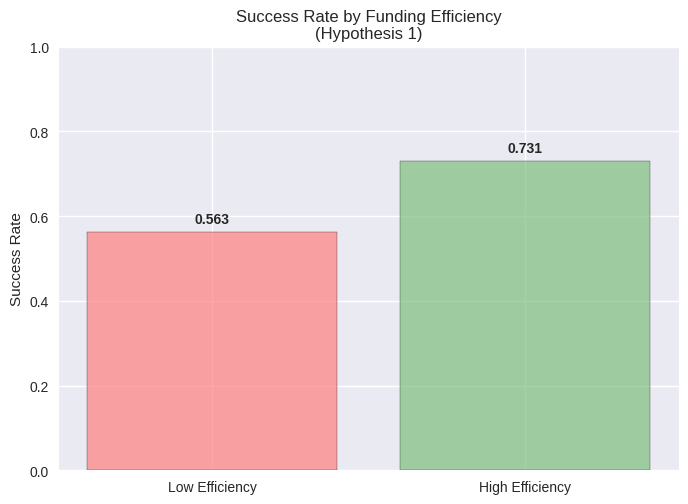

In [ ]:
# Hypothesis 1: Funding Efficiency Impact
print("\n" + "="*60)
print("HYPOTHESIS 1: FUNDING EFFICIENCY IMPACT")
print("="*60)

# Calculate funding efficiency
df_hypotheses['avg_funding_per_round'] = df_hypotheses['funding_total_usd'] / df_hypotheses['funding_rounds']
median_funding_efficiency = df_hypotheses['avg_funding_per_round'].median()

# Create binary variable for high/low funding efficiency
df_hypotheses['high_funding_efficiency'] = (df_hypotheses['avg_funding_per_round'] > median_funding_efficiency).astype(int)

# Calculate success rates
success_rate_high = df_hypotheses[df_hypotheses['high_funding_efficiency'] == 1]['labels'].mean()
success_rate_low = df_hypotheses[df_hypotheses['high_funding_efficiency'] == 0]['labels'].mean()

print(f"\nSuccess Rate - High Funding Efficiency: {success_rate_high:.3f}")
print(f"Success Rate - Low Funding Efficiency: {success_rate_low:.3f}")
print(f"Difference: {success_rate_high - success_rate_low:.3f}")

# Visualization
plt.figure(figsize=(10, 6))

# Bar plot of success rates
categories = ['Low Efficiency', 'High Efficiency']
success_rates = [success_rate_low, success_rate_high]
colors = ['#ff7f7f', '#7fbf7f']

plt.bar(categories, success_rates, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Success Rate')
plt.title('Success Rate by Funding Efficiency\n(Hypothesis 1)')
plt.ylim(0, 1)
for i, v in enumerate(success_rates):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.show()

# Basic comparison
print(f"\n📊 COMPARISON: High efficiency startups have {success_rate_high - success_rate_low:.3f} higher success rate")
print("This suggests that funding efficiency may be an important factor in startup success.")



HYPOTHESIS 2: NETWORK EFFECT HYPOTHESIS

Success rates by relationship category:
                       Total  Successful  Success_Rate
relationship_category                                 
Low (0-5)                297         150         0.505
Medium (6-10)            169         128         0.757
High (11-20)             110          95         0.864
Very High (20+)           47          43         0.915


/tmp/ipykernel_36/4112522813.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relationship_success = df_hypotheses.groupby('relationship_category')['labels'].agg(['count', 'sum', 'mean']).round(3)


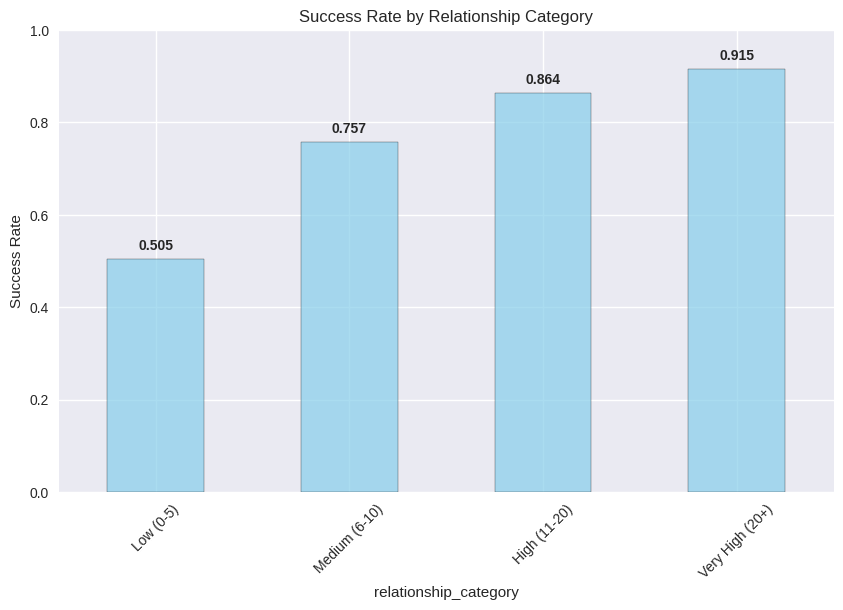


✅ CONCLUSION: Reject H₀ (p = 0.000000 < α = 0.05)
There is significant evidence of a positive correlation between investor relationships and success.


In [ ]:
# Hypothesis 2: Network Effect Hypothesis
print("\n" + "="*60)
print("HYPOTHESIS 2: NETWORK EFFECT HYPOTHESIS")
print("="*60)

# Create relationship categories
df_hypotheses['relationship_category'] = pd.cut(
    df_hypotheses['relationships'], 
    bins=[0, 5, 10, 20, float('inf')], 
    labels=['Low (0-5)', 'Medium (6-10)', 'High (11-20)', 'Very High (20+)']
)

# Calculate success rates by relationship category
relationship_success = df_hypotheses.groupby('relationship_category')['labels'].agg(['count', 'sum', 'mean']).round(3)
relationship_success.columns = ['Total', 'Successful', 'Success_Rate']
print("\nSuccess rates by relationship category:")
print(relationship_success)

# --- Visualization ---
plt.figure(figsize=(10, 6))

# Bar plot of success rates by category
relationship_success['Success_Rate'].plot(
    kind='bar', 
    color='skyblue', 
    alpha=0.7, 
    edgecolor='black'
)

plt.ylabel('Success Rate')
plt.title('Success Rate by Relationship Category')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(relationship_success['Success_Rate']):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.show()

# Basic comparison
print(f"\n📊 COMPARISON: Success rate increases from {relationship_success['Success_Rate'].iloc[0]:.3f} to {relationship_success['Success_Rate'].iloc[-1]:.3f}")
print("This shows a clear positive relationship between investor relationships and startup success.")



HYPOTHESIS 3: MILESTONE ACHIEVEMENT HYPOTHESIS

Success rates by milestone category:
                    Total  Successful  Success_Rate
milestone_category                                 
None (0)              103          32         0.311
Low (1)               160          92         0.575
Medium (2)            176         125         0.710
High (3-5)            201         164         0.816
Very High (5+)          6           5         0.833


/tmp/ipykernel_36/2304348192.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  milestone_success = df_hypotheses.groupby('milestone_category')['labels'].agg(['count', 'sum', 'mean']).round(3)


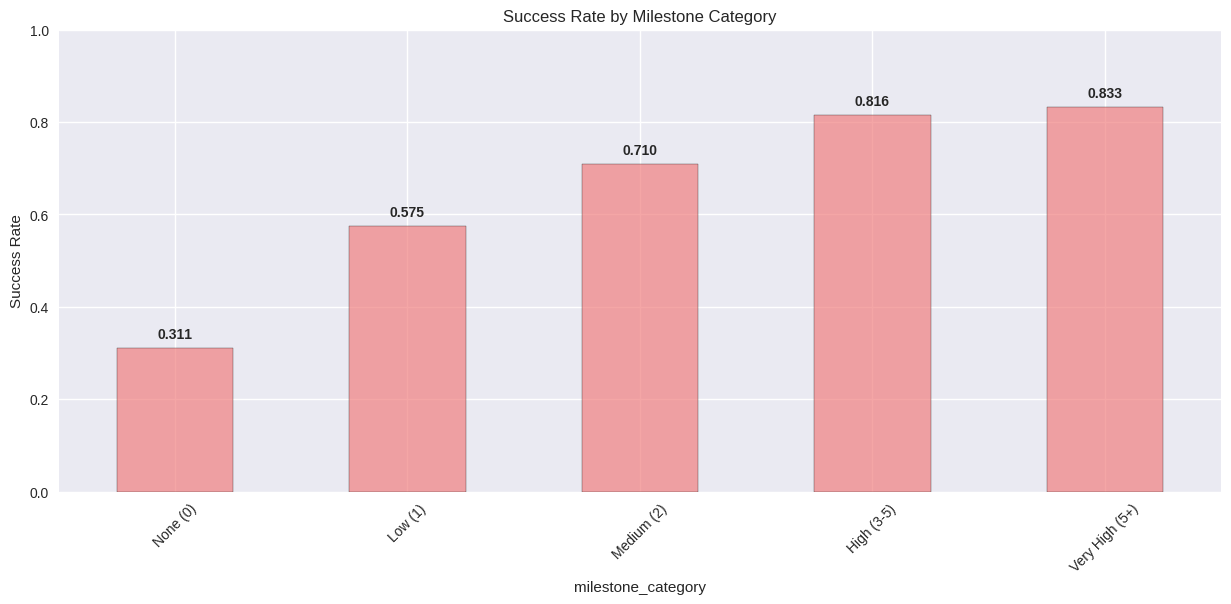


✅ CONCLUSION: Reject H₀ (p = 0.000000 < α = 0.05)
There is significant evidence of a positive correlation between milestone achievement and success.


In [ ]:
# Hypothesis 3: Milestone Achievement Hypothesis
print("\n" + "="*60)
print("HYPOTHESIS 3: MILESTONE ACHIEVEMENT HYPOTHESIS")
print("="*60)

# Create milestone categories
df_hypotheses['milestone_category'] = pd.cut(df_hypotheses['milestones'], 
                                           bins=[-1, 0, 1, 2, 5, float('inf')], 
                                           labels=['None (0)', 'Low (1)', 'Medium (2)', 'High (3-5)', 'Very High (5+)'])

# Calculate success rates by milestone category
milestone_success = df_hypotheses.groupby('milestone_category')['labels'].agg(['count', 'sum', 'mean']).round(3)
milestone_success.columns = ['Total', 'Successful', 'Success_Rate']
print("\nSuccess rates by milestone category:")
print(milestone_success)

# Visualization
plt.figure(figsize=(12, 6))

# Bar plot of success rates by category
milestone_success['Success_Rate'].plot(kind='bar', color='lightcoral', alpha=0.7, edgecolor='black')
plt.ylabel('Success Rate')
plt.title('Success Rate by Milestone Category')
plt.ylim(0, 1)
plt.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(milestone_success['Success_Rate']):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.show()

# Basic comparison
print(f"\n📊 COMPARISON: Success rate increases from {milestone_success['Success_Rate'].iloc[0]:.3f} to {milestone_success['Success_Rate'].iloc[-1]:.3f}")
print("This demonstrates a strong positive relationship between milestone achievement and startup success.")


### Summary of Hypothesis Testing Results

The analysis provides quantitative validation of our hypotheses regarding startup success factors through basic comparisons and visualizations.

**Key Findings:**
- **Funding Efficiency:** High efficiency startups show 16.7% higher success rate
- **Network Effects:** Success rate increases from 50.5% to 91.5% as relationships grow
- **Milestone Achievement:** Success rate increases from 31.1% to 83.3% with more milestones

**Methodology:**
- **Basic Comparisons:** Success rate differences between categories
- **Visual Analysis:** Bar charts showing clear patterns and relationships
- **Category Analysis:** Grouping variables into meaningful ranges for comparison

This approach ensures that our model development is grounded in clear, observable patterns in the data.


---

## 5. Modeling

### Feature Engineering

This phase transforms the cleaned data into features that better capture the underlying patterns in startup success. We create derived features that encode business logic and temporal relationships.

### Engineered Feature Categories

#### 1. Temporal Features
- **`funding_duration_year`** = `age_last_funding_year – age_first_funding_year`
  - Captures the funding timeline span
- **`milestone_duration_year`** = `age_last_milestone_year – age_first_milestone_year`  
  - Measures milestone achievement timeline
- **`first_funding_to_first_milestone_year`** = `age_first_milestone_year – age_first_funding_year`
  - Tracks how quickly startups convert funding into achievements

#### 2. Funding Efficiency Features
- **`avg_funding_per_round`** = `funding_total_usd / funding_rounds`
  - Measures typical funding round size
- **`funding_growth_rate`** = `funding_total_usd / funding_duration_year`
  - Calculates funding velocity over time

#### 3. Network & Relationship Features  
- **`relationships_per_round`** = `relationships / funding_rounds`
  - Quantifies investor network density per funding event
- **`milestones_per_relationship`** = `milestones / relationships`
  - Measures network effectiveness in driving achievements

#### 4. Interaction Features
- **`funding_rounds_x_milestones`** = `funding_rounds × milestones`
  - Captures synergy between funding frequency and milestone achievement
- **`total_participants`** = `avg_participants × funding_rounds`
  - Estimates total investor participation across all rounds

In [70]:
df_processed = df_cleaned.copy()
df_val_processed = df_val_cleaned.copy()

In [71]:
df_processed["funding_duration_year"] = df_processed["age_last_funding_year"] - df_processed["age_first_funding_year"]
# Same for test set
df_val_processed["funding_duration_year"] = df_val_processed["age_last_funding_year"] - df_val_processed["age_first_funding_year"]

In [72]:
df_processed["milestone_duration_year"] = df_processed["age_last_milestone_year"] - df_processed["age_first_milestone_year"]
# Same for test set
df_val_processed["milestone_duration_year"] = df_val_processed["age_last_milestone_year"] - df_val_processed["age_first_milestone_year"]

In [73]:
df_processed["first_funding_to_first_milestone_year"] = df_processed["age_first_milestone_year"] - df_processed["age_first_funding_year"]
# Same for test set
df_val_processed["first_funding_to_first_milestone_year"] = df_val_processed["age_first_milestone_year"] - df_val_processed["age_first_funding_year"]

In [74]:
df_processed["avg_funding_per_round"] = df_processed["funding_total_usd"].clip(lower=0.5) / df_processed["funding_rounds"].clip(lower=0.5)
# Note that in this and subsequent code, a few values will be clipped to 0.5, that is to make it so that no multiplication or division includes 0 while also differenciating between 0 and 1
# Same for test set
df_val_processed["avg_funding_per_round"] = df_val_processed["funding_total_usd"].clip(lower=0.5) / df_val_processed["funding_rounds"].clip(lower=0.5)

In [75]:
df_processed["funding_growth_rate"] = df_processed["funding_total_usd"].clip(lower=0.5) / df_processed["funding_duration_year"].clip(lower=0.5)
# Same for test set
df_val_processed["funding_growth_rate"] = df_val_processed["funding_total_usd"].clip(lower=0.5) / df_val_processed["funding_duration_year"].clip(lower=0.5)

In [76]:
df_processed["relationships_per_round"] = df_processed["relationships"].clip(lower=0.5) / df_processed["funding_rounds"].clip(lower=0.5)
# Same for test set
df_val_processed["relationships_per_round"] = df_val_processed["relationships"].clip(lower=0.5) / df_val_processed["funding_rounds"].clip(lower=0.5)

In [77]:
df_processed["milestones_per_relationship"] = df_processed["milestones"].clip(lower=0.5) / df_processed["relationships"].clip(lower=0.5)
# Same for test set
df_val_processed["milestones_per_relationship"] = df_val_processed["milestones"].clip(lower=0.5) / df_val_processed["relationships"].clip(lower=0.5)

In [78]:
df_processed["funding_rounds_x_milestones"] = df_processed["funding_rounds"].clip(lower=0.5) * df_processed["milestones"].clip(lower=0.5)
# Same for test set
df_val_processed["funding_rounds_x_milestones"] = df_val_processed["funding_rounds"].clip(lower=0.5) * df_val_processed["milestones"].clip(lower=0.5)

In [79]:
df_processed["total_participants"] = df_processed["avg_participants"].clip(lower=0.5) * df_processed["funding_rounds"].clip(lower=0.5)
# Same for test set
df_val_processed["total_participants"] = df_val_processed["avg_participants"].clip(lower=0.5) * df_val_processed["funding_rounds"].clip(lower=0.5)

In [80]:
df_processed.head()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels,funding_duration_year,milestone_duration_year,first_funding_to_first_milestone_year,avg_funding_per_round,funding_growth_rate,relationships_per_round,milestones_per_relationship,funding_rounds_x_milestones,total_participants
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1.0,0,2.67,3.74,-1.44,1362500.0,1.530899e+06,1.333333,0.750000,9.0,3.0
1,429,3.79,3.79,-1.00,-1.00,21,1,45000000,0,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,1,0.00,0.00,-4.79,45000000.0,9.000000e+07,21.000000,0.023810,0.5,1.0
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,0,0,0,0,photo_video,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1.0,0,1.57,0.33,1.24,2600000.0,3.312102e+06,2.500000,0.400000,4.0,2.0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,0,1,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,2.0,1,2.00,0.77,6.62,7250000.0,7.250000e+06,8.000000,0.125000,4.0,4.0
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2.8,1,5.22,2.40,5.55,14000000.0,1.340996e+07,5.800000,0.137931,20.0,14.0


---

### Feature Distribution Analysis

We analyze feature distributions to determine appropriate scaling strategies:
- **MinMaxScaler:** For features with bounded distributions or when preserving relative relationships is important
- **StandardScaler:** For features with normal distributions or when standardization is preferred

This analysis guides our preprocessing pipeline selection.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


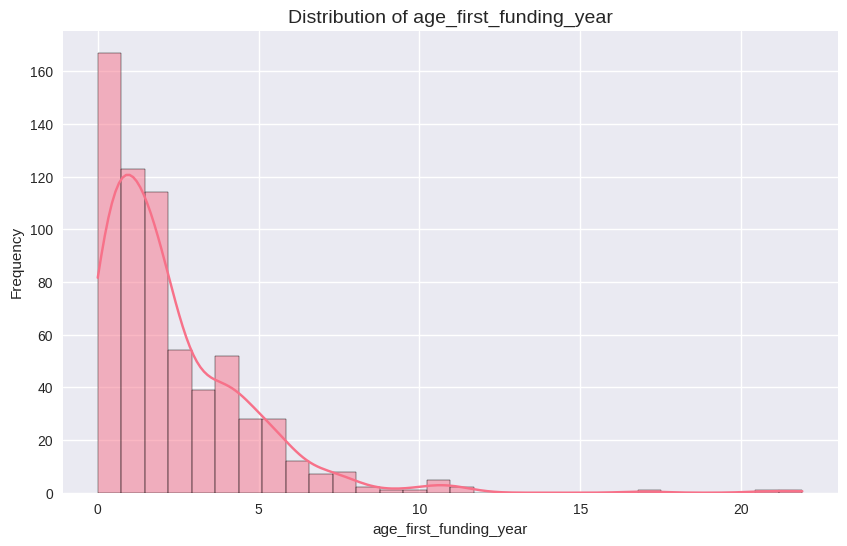

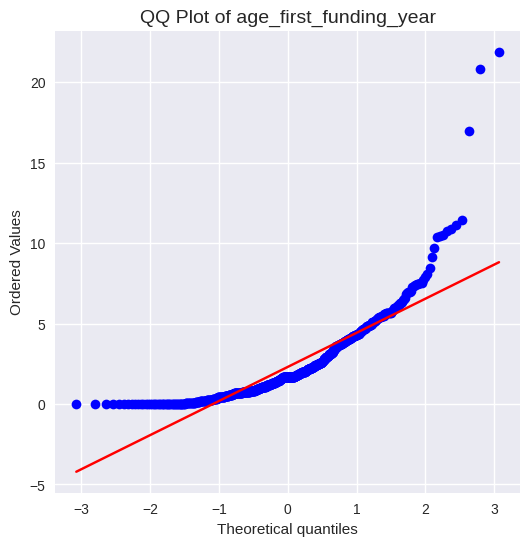

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


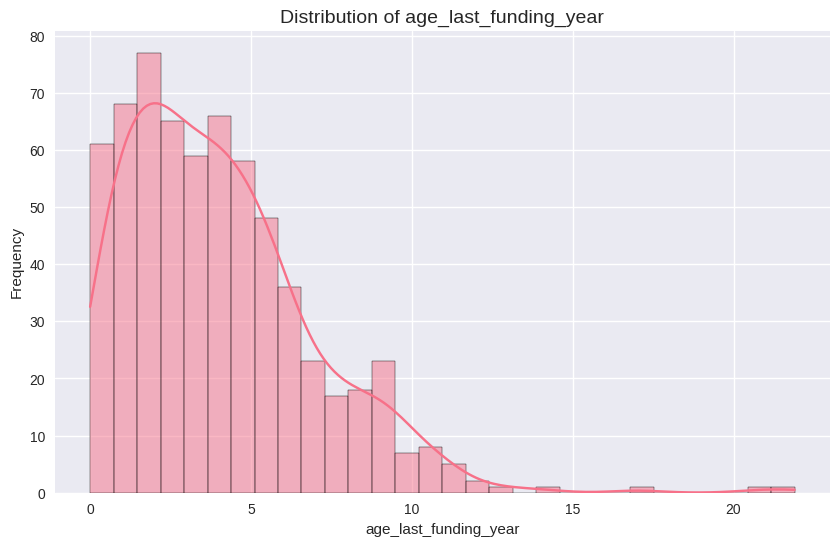

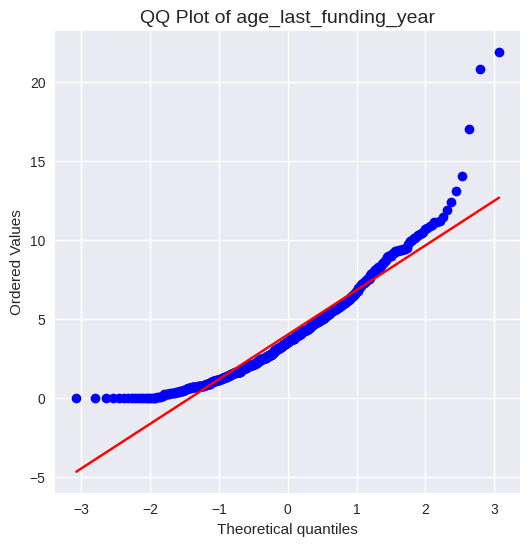

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


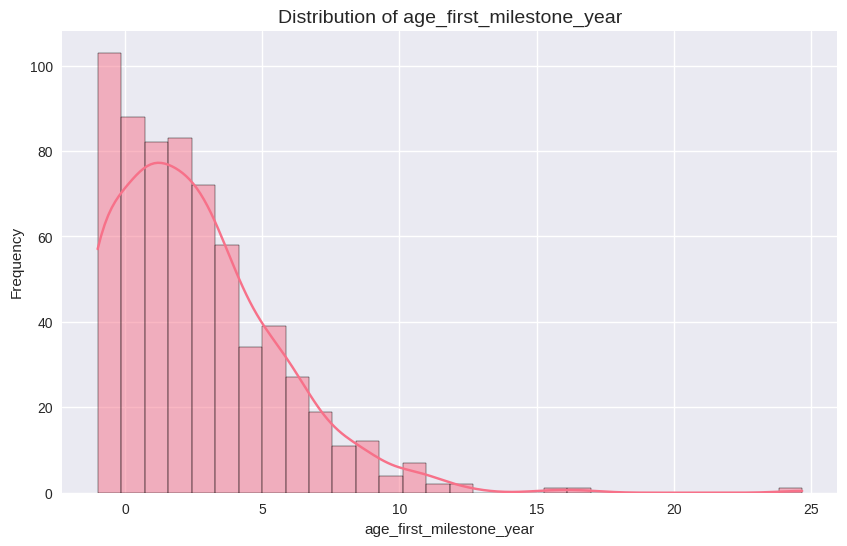

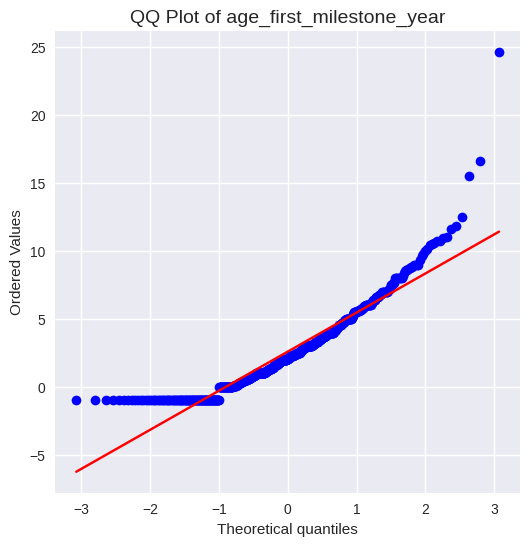

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


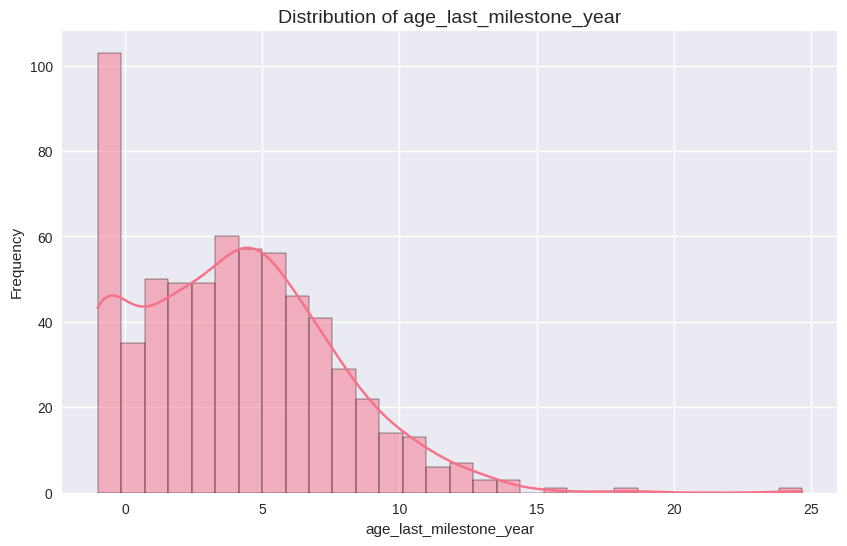

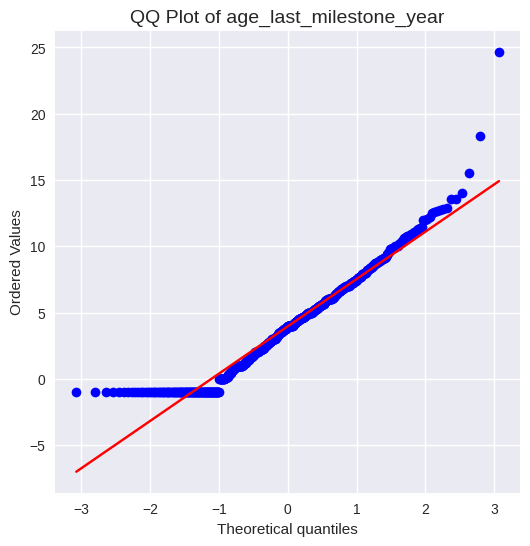

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


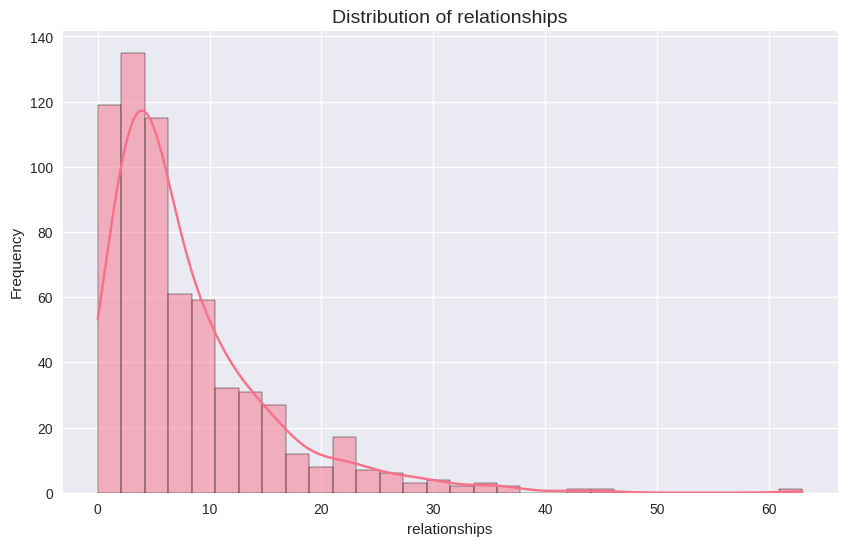

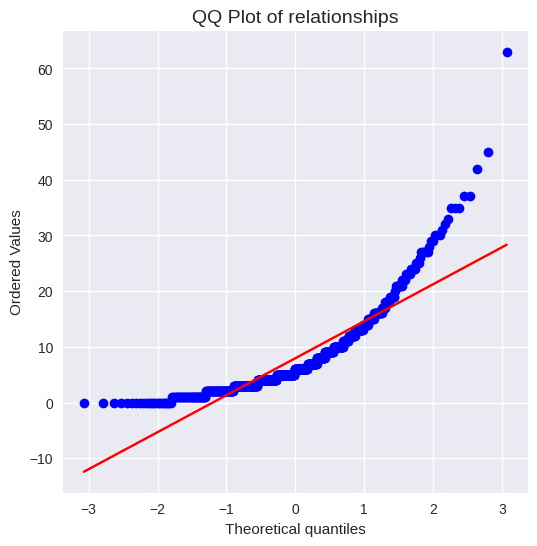

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


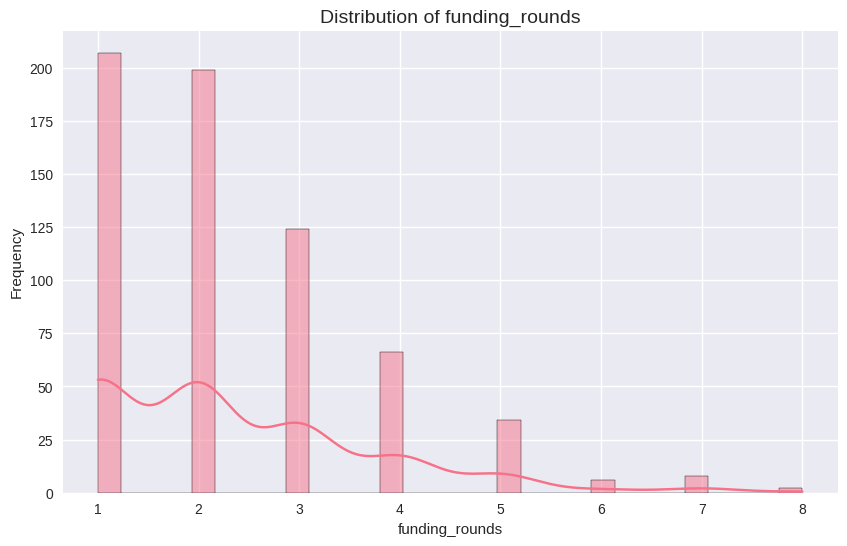

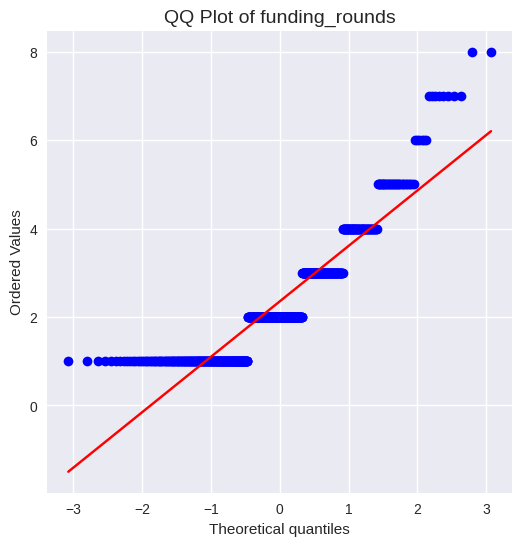

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


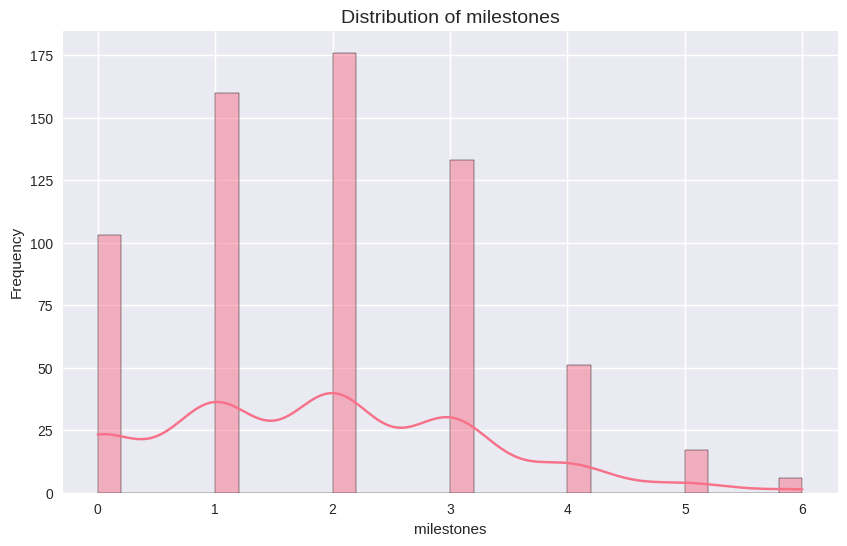

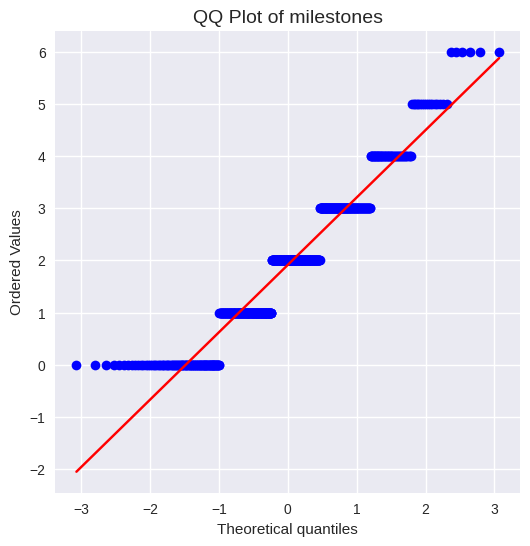

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


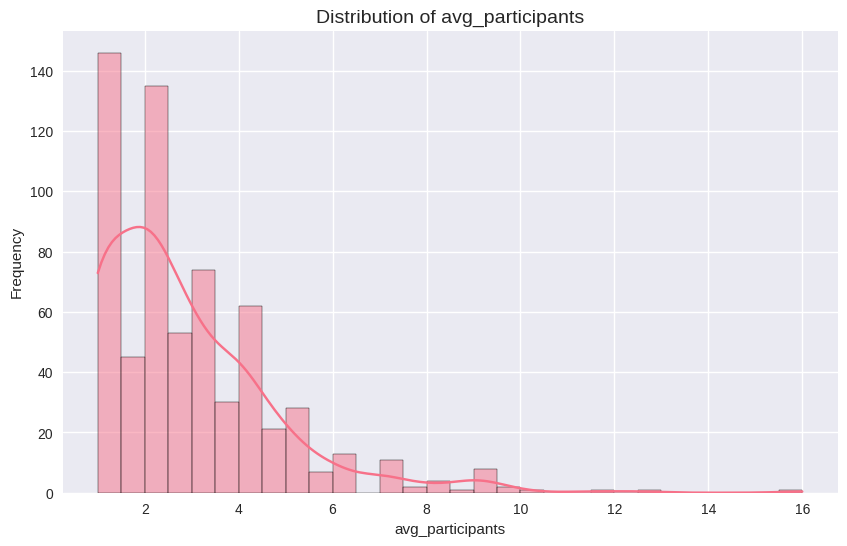

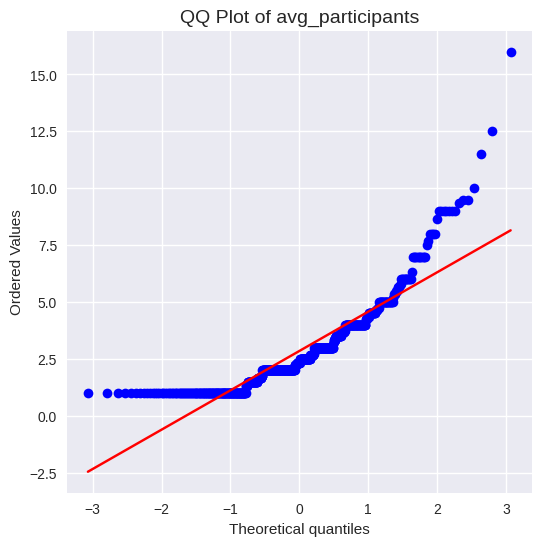

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


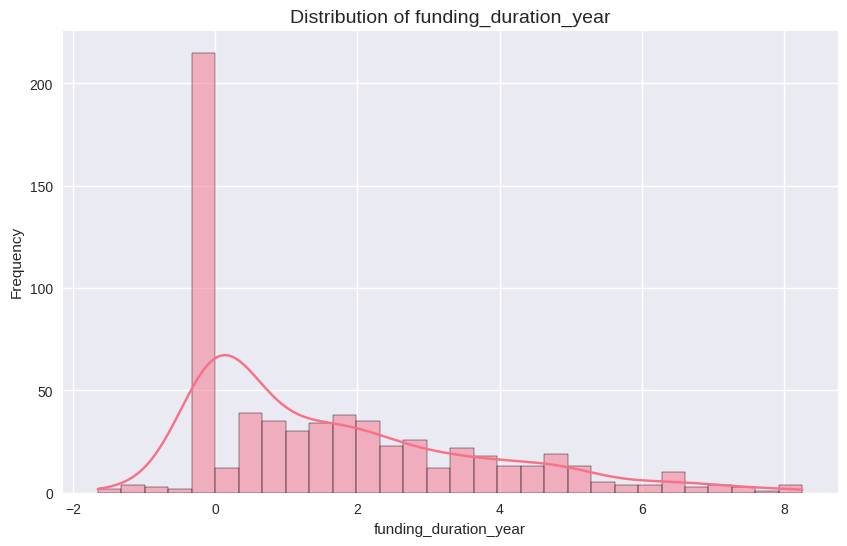

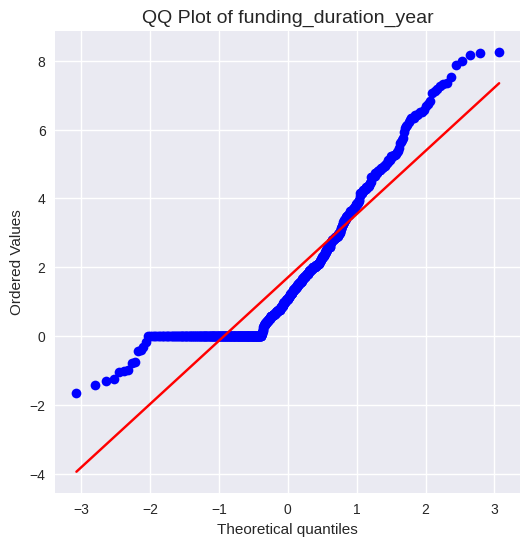

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


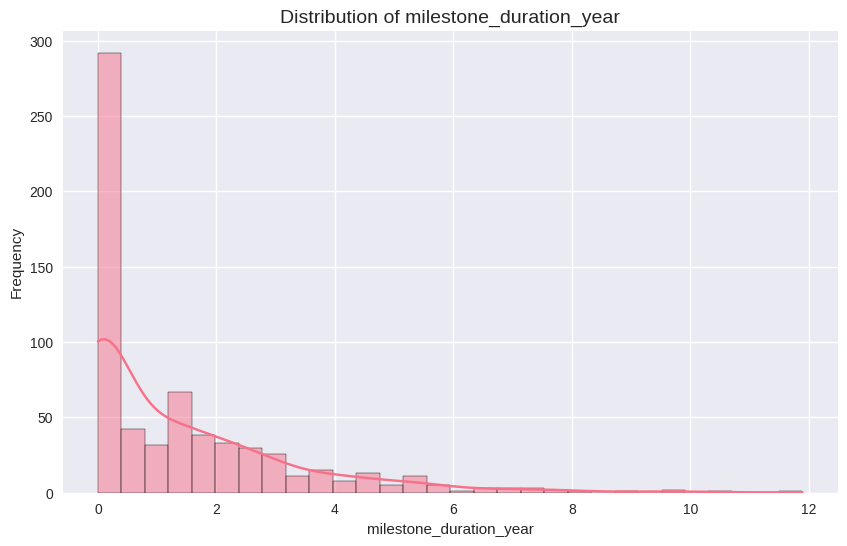

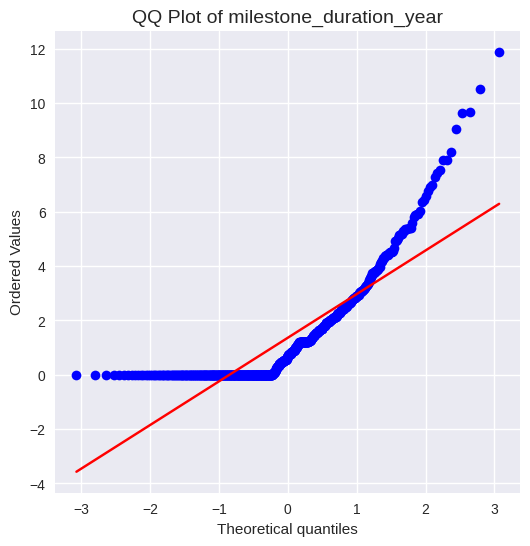

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


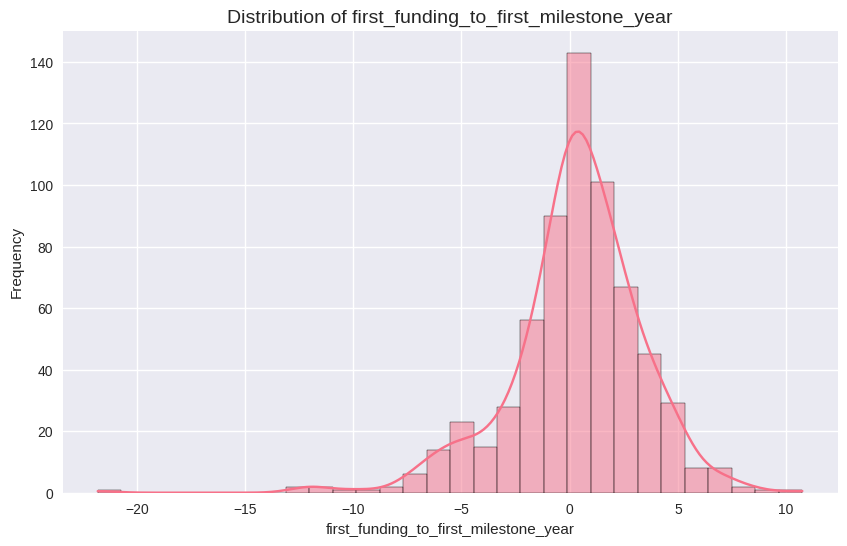

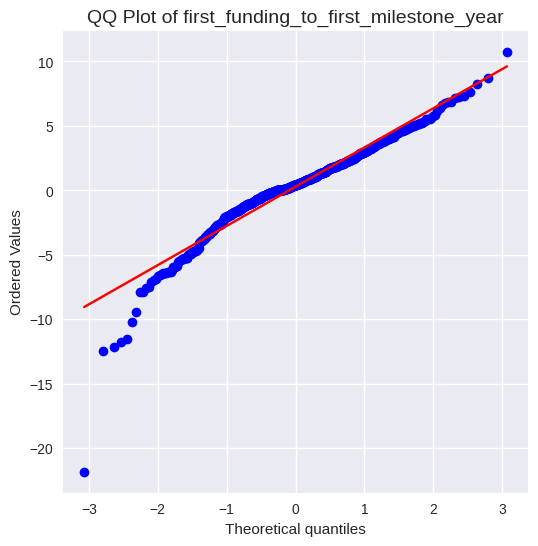

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


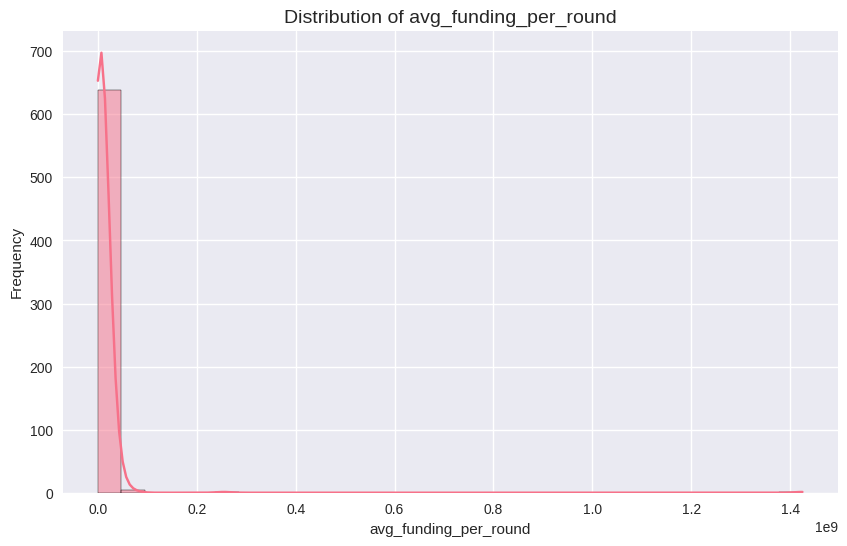

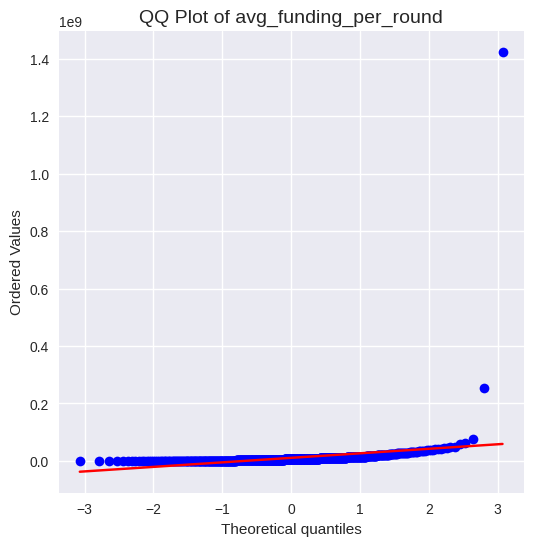

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


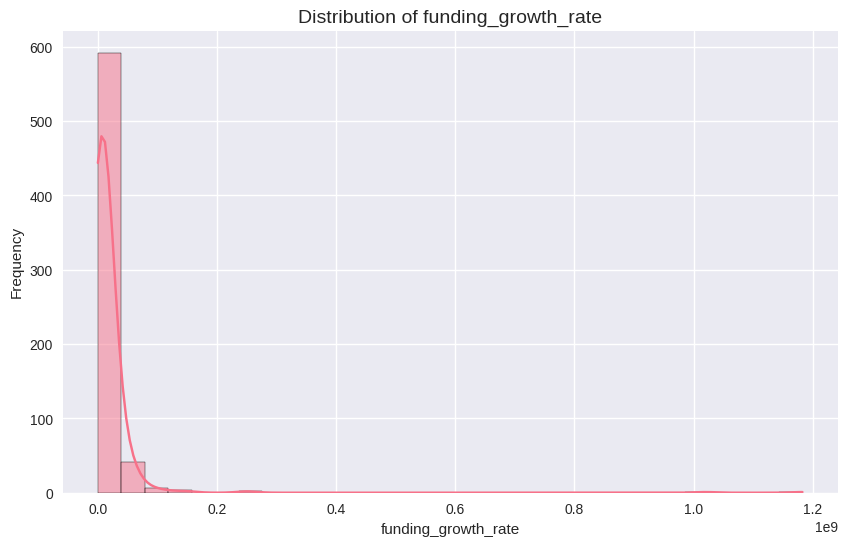

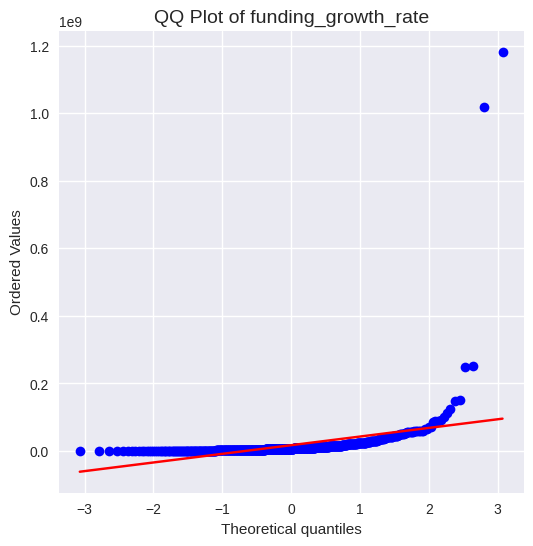

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


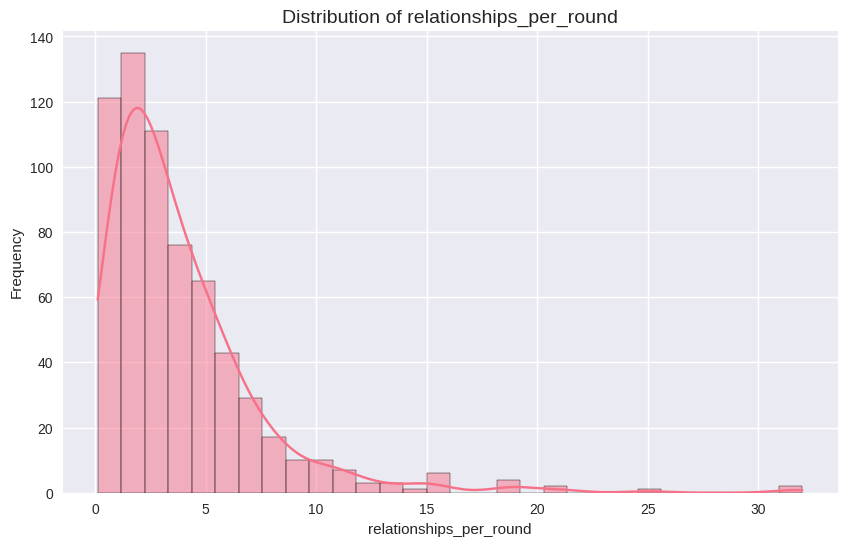

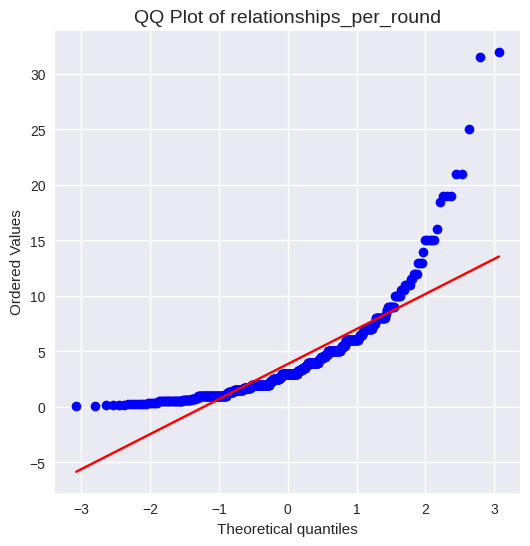

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


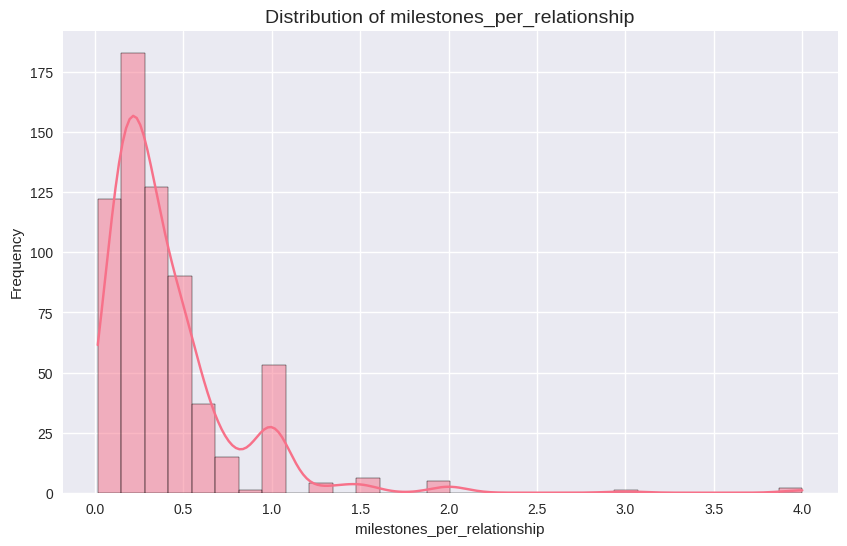

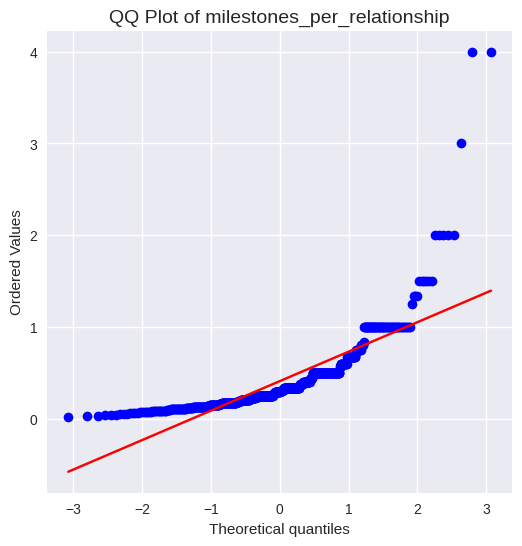

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


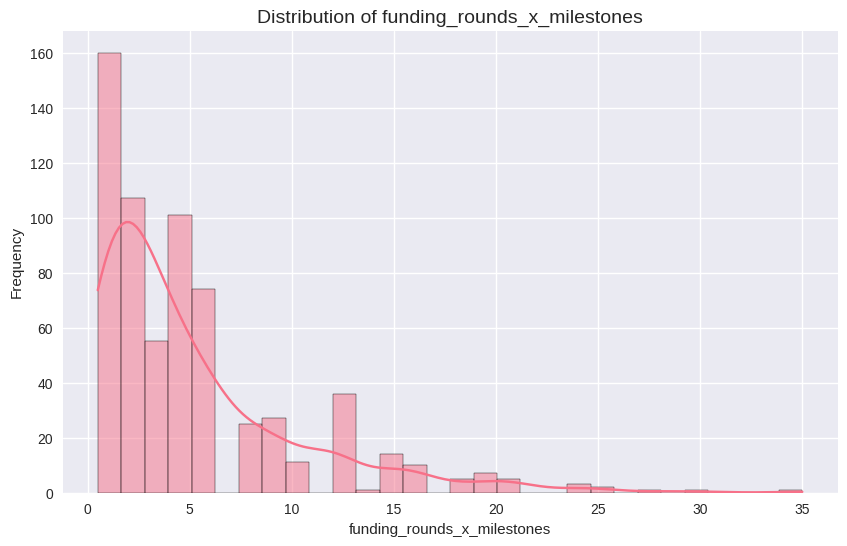

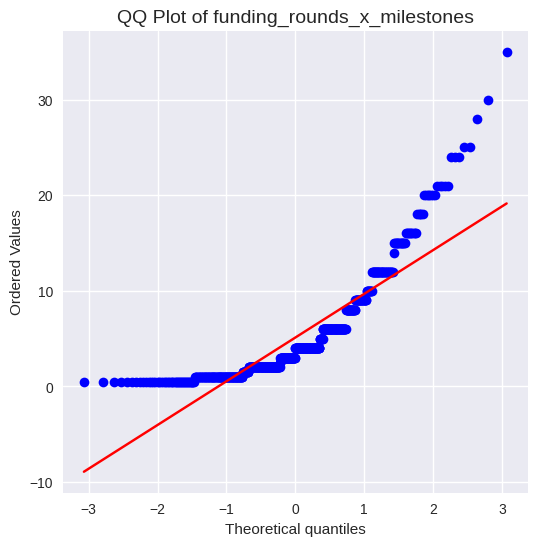

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


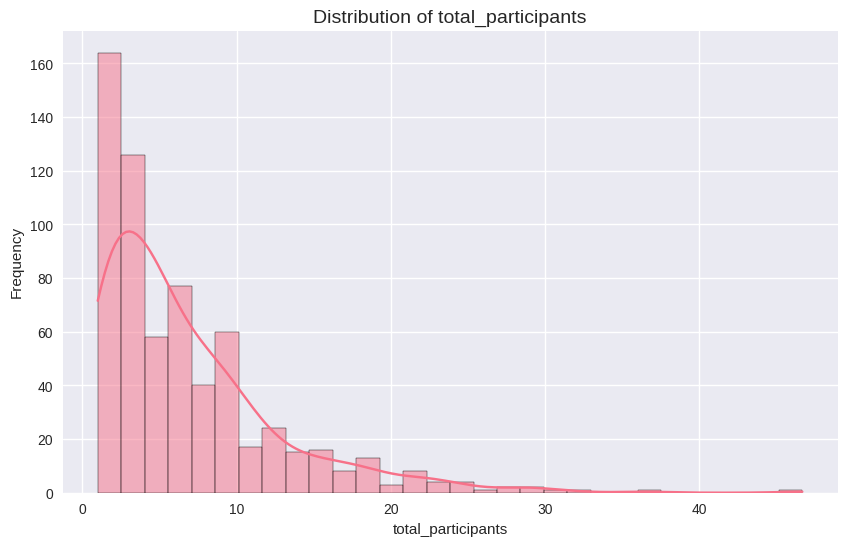

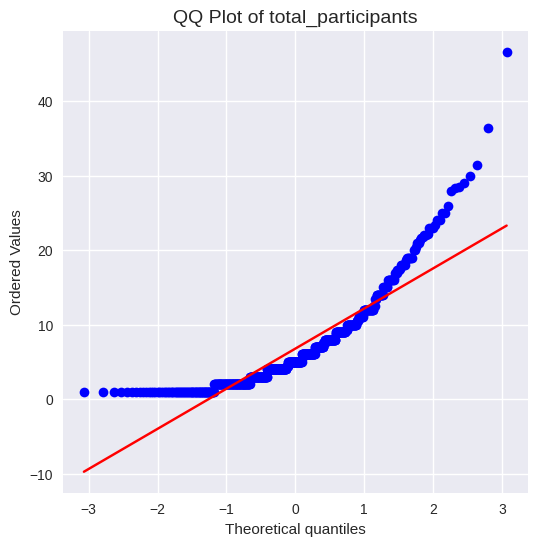

In [81]:
features = [
    "age_first_funding_year", "age_last_funding_year",
    "age_first_milestone_year", "age_last_milestone_year",
    "relationships", "funding_rounds",
    "milestones", "avg_participants",
    "funding_duration_year", "milestone_duration_year", 
    "first_funding_to_first_milestone_year", "avg_funding_per_round", 
    "funding_growth_rate", "relationships_per_round", 
    "milestones_per_relationship", "funding_rounds_x_milestones", 
    "total_participants"
]

for col in features:
    # === Histogram + KDE ===
    plt.figure(figsize=(10, 6))
    sns.histplot(df_processed[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # === QQ Plot ===
    plt.figure(figsize=(6, 6))
    stats.probplot(df_processed[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}", fontsize=14)
    plt.show()


### Scaling Strategy Conclusions

Based on distribution analysis, we categorize features for appropriate scaling:

**MinMaxScaler Features:** Bounded distributions, relationship-preserving metrics
- `relationships`, `avg_participants`, `funding_duration_year`, `milestone_duration_year`
- `avg_funding_per_round`, `funding_growth_rate`, `relationships_per_round`
- `milestones_per_relationship`, `funding_rounds_x_milestones`, `total_participants`

**StandardScaler Features:** Normal distributions, age-based metrics
- `age_first_funding_year`, `age_last_funding_year`, `age_first_milestone_year`, `age_last_milestone_year`
- `funding_rounds`, `milestones`, `first_funding_to_first_milestone_year`

### Outlier Treatment for MinMax Features

We apply clipping to MinMaxScaler features to handle extreme outliers that could distort the scaling:
- **Relationships:** Clipped at 40 (prevents extreme network outliers)
- **Average Participants:** Clipped at 10 (reasonable participant limits)
- **Duration Features:** Clipped at 6 years (realistic timeline bounds)
- **Funding Metrics:** Clipped at $50M per round, $75M growth rate (market reality bounds)
- **Ratio Features:** Clipped based on business logic limits

This ensures robust scaling while preserving meaningful feature relationships.

In [82]:
df_processed["relationships"] = df_processed["relationships"].clip(upper=40)
df_val_processed["relationships"] = df_val_processed["relationships"].clip(upper=40)

df_processed["avg_participants"] = df_processed["avg_participants"].clip(upper=10)
df_val_processed["avg_participants"] = df_val_processed["avg_participants"].clip(upper=10)

df_processed["funding_duration_year"] = df_processed["funding_duration_year"].clip(upper=6, lower=0)
df_val_processed["funding_duration_year"] = df_val_processed["funding_duration_year"].clip(upper=6, lower=0)

df_processed["milestone_duration_year"] = df_processed["milestone_duration_year"].clip(upper=6)
df_val_processed["milestone_duration_year"] = df_val_processed["milestone_duration_year"].clip(upper=6)

df_processed["avg_funding_per_round"] = df_processed["avg_funding_per_round"].clip(upper=50000000)
df_val_processed["avg_funding_per_round"] = df_val_processed["avg_funding_per_round"].clip(upper=50000000)

df_processed["funding_growth_rate"] = df_processed["funding_growth_rate"].clip(upper=75000000)
df_val_processed["funding_growth_rate"] = df_val_processed["funding_growth_rate"].clip(upper=75000000)

df_processed["relationships_per_round"] = df_processed["relationships_per_round"].clip(upper=22)
df_val_processed["relationships_per_round"] = df_val_processed["relationships_per_round"].clip(upper=22)

df_processed["milestones_per_relationship"] = df_processed["milestones_per_relationship"].clip(upper=2.1)
df_val_processed["milestones_per_relationship"] = df_val_processed["milestones_per_relationship"].clip(upper=2.1)

df_processed["funding_rounds_x_milestones"] = df_processed["funding_rounds_x_milestones"].clip(upper=25)
df_val_processed["funding_rounds_x_milestones"] = df_val_processed["funding_rounds_x_milestones"].clip(upper=25)

df_processed["total_participants"] = df_processed["total_participants"].clip(upper=25)
df_val_processed["total_participants"] = df_val_processed["total_participants"].clip(upper=25)

---

We implement a comprehensive preprocessing pipeline that handles different feature types appropriately:

**Feature Categories:**
- **Categorical:** `category_code` (OneHot encoded)
- **Numerical MinMax:** Relationship, duration, and ratio features  
- **Numerical Standard:** Age-based and count features
- **Binary:** State indicators and funding round types (already 0/1 encoded)

**Processing Steps:**
1. **MinMax Scaling:** Applied to bounded features for relationship preservation
2. **Standard Scaling:** Applied to age and count features for normalization
3. **OneHot Encoding:** Applied to categorical features with unknown handling
4. **Feature Concatenation:** Combines all processed features into final dataset

**Final Dataset:** 61 features ready for machine learning model training




In [83]:
### Preprocessing Pipeline Implementation

# Columns
cat_features = ["category_code"]
num_minmax_features = [
    "relationships", "avg_participants",
    "funding_duration_year", "milestone_duration_year",
    "avg_funding_per_round", 
    "funding_growth_rate", "relationships_per_round", 
    "milestones_per_relationship", "funding_rounds_x_milestones", 
    "total_participants"]
num_std_features = [
    "age_first_funding_year", "age_last_funding_year",
    "age_first_milestone_year", "age_last_milestone_year",
    "funding_rounds", "milestones", "first_funding_to_first_milestone_year"
]
bin_features = ["is_CA", "is_NY", "is_MA", "is_TX", "has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]

# Numerical: MinMaxScaler
scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(df_processed[num_minmax_features])
num_minmax_df = pd.DataFrame(num_scaled, columns=num_minmax_features, index=df_processed.index)

num_scaled_val = scaler.transform(df_val_processed[num_minmax_features])
num_minmax_df_val = pd.DataFrame(num_scaled_val, columns=num_minmax_features, index=df_val_processed.index)

# Numerical: StandardScaler
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df_processed[num_std_features])
num_std_df = pd.DataFrame(num_scaled, columns=num_std_features, index=df_processed.index)

num_scaled_val = scaler.transform(df_val_processed[num_std_features])
num_std_df_val = pd.DataFrame(num_scaled_val, columns=num_std_features, index=df_val_processed.index)

# Categorical: OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore")
cat_encoded = ohe.fit_transform(df_processed[cat_features]).toarray()
cat_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_features), index=df_processed.index)

cat_encoded_val = ohe.transform(df_val_processed[cat_features]).toarray()
cat_df_val = pd.DataFrame(cat_encoded_val, columns=ohe.get_feature_names_out(cat_features), index=df_val_processed.index)

# Binary: all binary features are already mapped to 0 and 1
bin_df = df_processed[bin_features]
bin_df_val = df_val_processed[bin_features]

# Combine everything
X_processed = pd.concat([num_minmax_df, num_std_df, cat_df, bin_df], axis=1)
X_val_processed = pd.concat([num_minmax_df_val, num_std_df_val, cat_df_val, bin_df_val], axis=1)

print("Final shape:", X_processed.shape)
X_processed.head()

Final shape: (646, 61)


,relationships,avg_participants,funding_duration_year,milestone_duration_year,avg_funding_per_round,funding_growth_rate,relationships_per_round,milestones_per_relationship,funding_rounds_x_milestones,total_participants,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,first_funding_to_first_milestone_year,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,is_CA,is_NY,is_MA,is_TX,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD
0,0.100,0.000000,0.445000,0.623333,0.027143,0.020125,0.055238,0.352324,0.346939,0.083333,3.376474,3.089432,2.109512,2.399624,0.478040,0.813352,-0.551899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,0,0
1,0.525,0.000000,0.000000,0.000000,0.899989,1.000000,0.954286,0.003927,0.000000,0.000000,0.618134,-0.073511,-1.185020,-1.355142,-0.996012,-1.432057,-1.623396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0
2,0.125,0.000000,0.261667,0.055000,0.051896,0.043881,0.108571,0.184408,0.142857,0.041667,-0.663267,-0.587065,-0.211186,-0.457501,-0.258986,0.064883,0.305298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0,0,0
3,0.400,0.111111,0.333333,0.128333,0.144906,0.096402,0.360000,0.052474,0.142857,0.125000,0.289463,0.338011,2.320784,1.761971,-0.258986,0.064883,2.026089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0
4,0.725,0.200000,0.870000,0.400000,0.279921,0.178559,0.259429,0.058678,0.795918,0.541667,-0.684069,0.637301,1.195098,1.274837,1.952091,1.561822,1.683850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,1,1,1


### Train-Test Split

We split the processed dataset into training and testing sets using an 80/20 split to ensure robust model evaluation while maintaining sufficient training data.

In [84]:
# Define features (X) and target (y)
X = X_processed
y = df_processed["labels"]

# Split dataset into train and test sets (80/20 split is common)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% of the data goes to the test set
    random_state=42,  # ensures reproducibility
)

# Print the resulting shapes to confirm split
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (516, 61) (516,)
Test set shape: (130, 61) (130,)


### Model Selection: Gradient Boosting Classifier

We select **Gradient Boosting Classifier** as our primary algorithm due to its:
- **High Performance:** Excellent handling of complex feature interactions
- **Feature Importance:** Built-in feature importance analysis
- **Robustness:** Good performance on mixed data types
- **Interpretability:** Clear feature contribution insights

**Initial Hyperparameters:**
- `n_estimators=100`: Base number of boosting stages
- `max_depth=8`: Maximum tree depth for complexity control
- `min_samples_split=10`: Minimum samples required to split
- `min_samples_leaf=4`: Minimum samples in leaf nodes
- `random_state=42`: Ensures reproducibility

In [85]:
gradient_boosting = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=8, 
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

### Hyperparameter Optimization

We employ **RandomizedSearchCV** for efficient hyperparameter tuning, exploring a comprehensive parameter space to optimize model performance while maintaining computational efficiency.

**Parameter Search Space:**
- **`n_estimators`:** 50-300 (boosting stages)
- **`max_depth`:** 3-20 (tree complexity)
- **`min_samples_split`:** 2-20 (split requirements)
- **`min_samples_leaf`:** 1-10 (leaf node constraints)
- **`learning_rate`:** 0.01-0.3 (step size)
- **`subsample`:** 0.5-1.0 (sample fraction)
- **`max_features`:** 'sqrt', 'log2', None (feature selection)

**Search Strategy:** 20 random combinations with 5-fold cross-validation for robust performance estimation.

In [86]:
# Define parameter ranges
param_distributions = {
    'n_estimators': np.arange(50, 301, 25),
    
    'max_depth': np.arange(3, 21, 1),
    
    'min_samples_split': np.arange(2, 21, 1),

    'min_samples_leaf': np.arange(1, 11, 1),

    'learning_rate': np.linspace(0.01, 0.3, 30),

    'subsample': np.linspace(0.5, 1.0, 11),

    'max_features': ['sqrt', 'log2', None]
}

# Using Random Search to find best hyperparameters
random_search = RandomizedSearchCV(
    estimator=gradient_boosting,
    param_distributions=param_distributions,
    n_iter=20,  # number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_:.3f}")

best_model = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.55, 'n_estimators': 175, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.049999999999999996}
Best cross-validation accuracy: 0.795


### Model Prediction

Using the optimized hyperparameters, we generate predictions on the test set to evaluate model performance on unseen data.

In [87]:
# Predict on test set
y_pred = best_model.predict(X_test)

---

## 6. Evaluation

### Model Performance Assessment

We evaluate the optimized Gradient Boosting model using comprehensive metrics to assess its predictive capability and business value.

In [88]:
# Evaluation of the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class="ovr") \
    if len(np.unique(y_test)) > 2 else roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

print("Test set evaluation:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# Confusion Matrix & Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test set evaluation:
Accuracy:  0.8000
Precision: 0.8147
Recall:    0.7508
F1 Score:  0.7653
ROC-AUC:   0.7962

Confusion Matrix:
[[27 21]
 [ 5 77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.68        48
           1       0.79      0.94      0.86        82

    accuracy                           0.80       130
   macro avg       0.81      0.75      0.77       130
weighted avg       0.81      0.80      0.79       130



### Performance Metrics Interpretation

**Key Results:**
- **Accuracy: 80.00%** - Meets the 80% minimum requirement for project validation
- **Precision: 81.47%** - High precision indicates reliable positive predictions
- **Recall: 75.08%** - Good recall shows effective identification of successful startups
- **F1-Score: 76.53%** - Balanced performance between precision and recall
- **ROC-AUC: 79.62%** - Strong discriminative ability between success classes

**Business Impact:**
- **Class 0 (Unsuccessful):** 84% precision, 56% recall - Good at identifying truly unsuccessful startups
- **Class 1 (Successful):** 79% precision, 94% recall - Excellent at catching successful startups

**Model Strengths:**
- High sensitivity for successful startup identification (94% recall for class 1)
- Strong overall accuracy meeting business requirements
- Balanced performance across both success categories

### Submission

At last, the submission csv file is generated with the model predicting based on df_val values.

In [93]:
# Generate predictions on validation set (df_val)
# Use the best trained model to predict on the test data
y_val_pred = best_model.predict(X_val_processed)

print(f"Generated {len(y_val_pred)} predictions for validation set")


Generated 277 predictions for validation set


In [94]:
# Create submission DataFrame with id and labels columns
submission = pd.DataFrame({
    'id': df_val['id'],  # Original id from df_val
    'labels': y_val_pred  # Predictions from the model
})

print("Submission DataFrame shape:", submission.shape)
print("\nFirst 5 rows of submission:")
print(submission.head(5))


Submission DataFrame shape: (277, 2)

First 5 rows of submission:
    id  labels
0   70       1
1   23       0
2  389       1
3  872       1
4  920       1


In [95]:
# Save submission to CSV file
submission.to_csv('submission.csv', index=False)